<a href="https://colab.research.google.com/github/Nadian-Ali/GeoImageClassificaiton/blob/main/exploreData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#what is 236?  got it!

#same rock / different depth / different pattern /// same class? or two classes? 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/My Drive'


/content/drive/My Drive


In [18]:
import os 
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
from google.colab.patches import cv2_imshow



In [4]:

Alis = 'Projects/GeoSampleClassification/data'
folder_location_in_drive= os.path.join(os.getcwd(),Alis)

file_names = [f for f in listdir(folder_location_in_drive) if( f.split('.')[-1]=='las' and isfile(join(folder_location_in_drive, f)))] #get list of the files with las extension 


In [5]:

# the FMI_reader function reads the .las files that contain FMI resistivity values.
# the output of the function is two numpy arrays 
#1. data which is 2D array with 192 colums and rows equal to the number of depth samples 
#2. the depth array which is a 1D array and contains all the depth
# samples
def FMI_reader(path):
    # f = open(path, 'r')
    # content = f.readlines()
    # f.close()
    with open(path,'r') as file:
      content  = file.readlines()
    data = []
    depth = []
    rock_type = path.split('.')[0].split('_')[0].split('/')[-1]
    for L in content:
        L = L.split(' ')
        res = [st for st in L if st != "" and st != '\n']
        if res[0] == '~Ascii':
            continue
        elif res[0] == '~Version':
            break
        elif len(res) == 1:
            depth.append(float(res[0]))
        else:
            data.extend(list(map(float, res)))

    data = np.array(data)
    depth = np.array(depth)
    data = np.reshape(data, (-1, 192))

    return data, depth, rock_type

/content/drive/My Drive/Projects/GeoSampleClassification/data/SstLoa_1.las


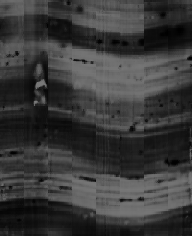

(236, 192)
/content/drive/My Drive/Projects/GeoSampleClassification/data/SstLoa_2.las


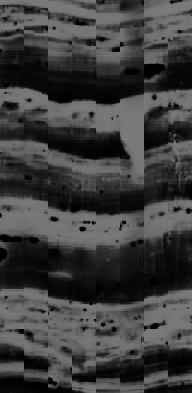

(393, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/SstHia_1.las


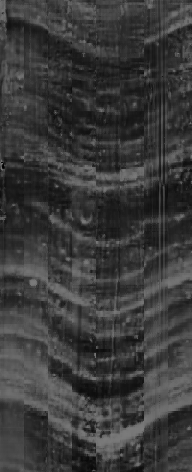

(472, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/SstHia_2.las


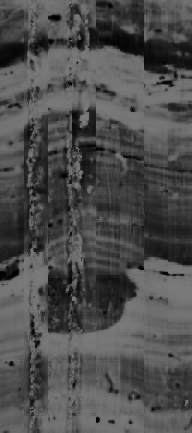

(433, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/CemtLa_1.las


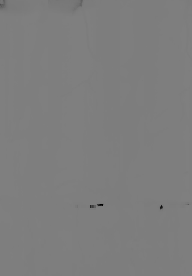

(276, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/CemtLa_2.las


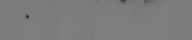

(40, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/HetLoc_1.las


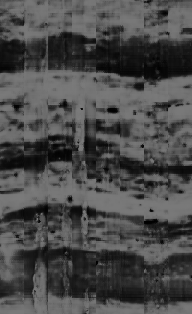

(314, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/HetLoc_2.las


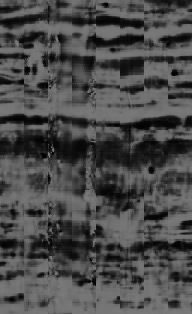

(314, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/HetHic_2.las


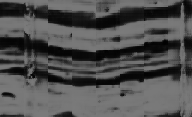

(117, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/HetHic_1.las


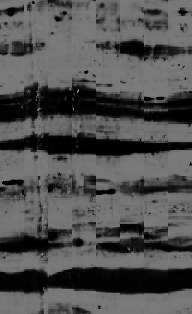

(314, 192)
/content/drive/MyDrive/Projects/GeoSampleClassification/data/full_image_crc2.las


In [6]:
Data = []
Depth = []
Rock_Type = []

for file in file_names:
  path = os.path.join( os.path.join(os.getcwd(),Alis,file))
  print(path)
  if 'full' not in path:
      
    # print(path)
    # path = '/content/drive/MyDrive/Projects/GeoSampleClassification/data/SstLoa_1.las'
    data,depth,rock_type = FMI_reader(path)
    Data.append(data)
    Depth.append(depth)
    Rock_Type.append(rock_type)
    cv2_imshow(data)
    print(np.shape(data))
    # print(rock_type)
    # cv2_imshow(data)
    # print(rock_type)

In [7]:
print('The samples in Data and Rock_Type are {} and {} respectively'.format(len(Data),len(Rock_Type)))

The samples in Data and Rock_Type are 10 and 10 respectively


In [113]:
Rock_Type

['SstLoa',
 'SstLoa',
 'SstHia',
 'SstHia',
 'CemtLa',
 'CemtLa',
 'HetLoc',
 'HetLoc',
 'HetHic',
 'HetHic']

In [9]:
classes = ['SstLoa', 'SstHia','CemtLa','HetLoc','HetHic']
cls = {Key:Label for Label,Key in enumerate(classes)}
Dta = np.array(Data)

<h1> Create new dataset</h1>

In [176]:
num_samples = 10
offset  = 192 
IM_Size = 192
def create_sample(im,IM_SIZE):
  rng = np.random.default_rng()
  indexable = np.shape(im)[0]- np.shape(im)[1]
  # print)
  if indexable <= 0:

    # print(indexable)
    im = np.pad(im,((0,abs(indexable)),(0,0)), mode = 'reflect')
    indexable = np.shape(im)[0]- np.shape(im)[1]
    idx = 0
    img = np.array(im[idx:idx+IM_SIZE,:])
    # random x rolling 
    rots = rng.choice(range(IM_SIZE),size = 2, replace = True)
    img = np.roll(img,rots[0],axis = 0)
    img = np.roll(img,rots[1],axis = 1)
    return img, indexable

 
  idx = rng.choice(range(indexable))
  # print(idx)
  rots = rng.choice(range(IM_SIZE),size = 2, replace = True)
  # print(rots)

  #sample data based on index to create IM_size,IM_size sample
  img = np.array(im[idx:idx+IM_SIZE,:])
  # random x rolling 
  img = np.roll(img,rots[0],axis = 0)
  img = np.roll(img,rots[1],axis = 1)
  return img, indexable


In [213]:
SAMPLES = 10
IM_SIZE = 192
X = []
lable = []
for idx,a_sample in enumerate(Dta):
  # print(idx)
  lbl = cls[Rock_Type[idx]]
  for s in range(SAMPLES):
    sample ,IDX = create_sample(a_sample,IM_SIZE)
    # print("\n")
    # cv2_imshow(sample)
    X.append(np.expand_dims(np.array(sample),axis=0))
    lable.append(lbl)

    
  



In [217]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers

In [206]:
input = (1,IM_SIZE,IM_SIZE
x = layers.Input( shape = input)
x = Conv2D(16,	 kernel_size=(3,3), 	 activation='relu')(x)
x = Conv2D(16,	 kernel_size=(3,3), 	 activation='relu')(x)
x = Conv2D(16,	 kernel_size=(3,3), 	 activation='relu')(x)

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

len(X),len(lable)

(192, 192)
(73728,)


the number of rows in this sample is (236, 192)
indexable_samples equals : 44


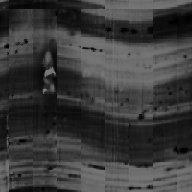

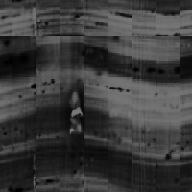

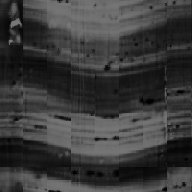

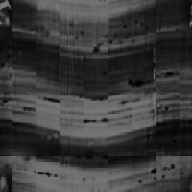

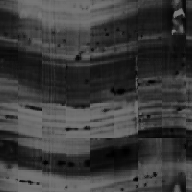

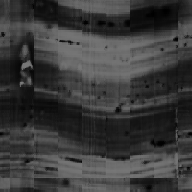

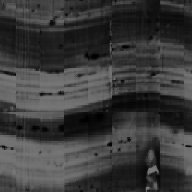

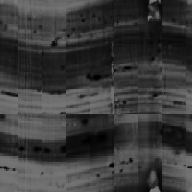

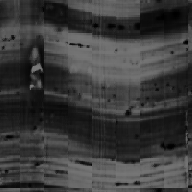

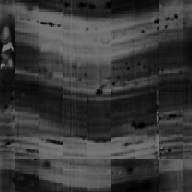

In [186]:


dataset = np 
# labels = 
# create a new sample 
# indicator i points to both the data , label 
i = 0
sample = Dta[i]
label  = cls[Rock_Type[i]]
print('the number of rows in this sample is {}'.format(np.shape(sample)))
# the number of indexs we can select from is : 
indexable_samples = np.shape(sample)[0] - np.shape(sample)[1]
print('indexable_samples equals : {}'.format(indexable_samples)) 


# random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)
rng = np.random.default_rng()
samples = rng.choice(range(indexable_samples),size=num_samples,replace = False)

for _ in samples:

  sampled_image = Dta[i][_:_+offset] 

  rot = rng.choice(range(IM_Size))
  sampled_image = np.roll(sampled_image,rot,axis = 0)
  sampled_image = np.roll(sampled_image,rot,axis = 1)
  cv2_imshow(sampled_image)
  print('\n')
# np.random.Generator.choice(range(10, 13),size=10)



# cv2_imshow(sample[:192,:])

In [ ]:
# random.Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)
rng = np.random.default_rng()
indexed_samples = rng.choice(range(44),size=10,replace = False)
offset = 192 
for K in indexed_samples:
  sampled_image = Dta[i][K:K+offset] 
  cv2_imshow(sampled_image)
  print('\n')
# np.random.Generator.choice(range(10, 13),size=10)

In [156]:
abs(-2)

2